In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
final_data = pd.read_csv("/Users/Hun/Desktop/Traces/final_data.csv", sep=";", parse_dates=["local_time", "UTS_time"])

In [12]:
final_data.head()

,id,lat,lon,UTS_time,username,type,URL,tags,local_time,local_hour,...,local_month,basename,local_path,google_tag,PC_google_1,PC_google_2,PC_google_user,days,is_tourist,PC_usertag
0,1019121614306305534_1210712456,59.938839,30.214373,2015-06-30 22:59:45,anastasiyaklep,image,https://scontent.cdninstagram.com/t51.2885-15/...,NaN,2015-07-01 01:59:45,1,...,7,11250247_455535837958292_1752377395_n.jpg,9/11250247_455535837958292_1752377395_n.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1019118321601692005_269937639,59.938839,30.214373,2015-06-30 22:53:12,andreyroki,image,https://scontent.cdninstagram.com/t51.2885-15/...,NaN,2015-07-01 01:53:12,1,...,7,11419062_1589903957942434_866590870_n.jpg,31/11419062_1589903957942434_866590870_n.jpg,NaN,NaN,NaN,NaN,0.0,True,NaN
2,1019117742863237464_269937639,59.938839,30.214373,2015-06-30 22:52:03,andreyroki,image,https://scontent.cdninstagram.com/t51.2885-15/...,бро,2015-07-01 01:52:03,1,...,7,11240677_714859628643068_230939050_n.jpg,41/11240677_714859628643068_230939050_n.jpg,NaN,NaN,NaN,NaN,0.0,True,NaN
3,1019117535498700775_335464448,59.938946,30.214831,2015-06-30 22:51:39,julia_bashkevich,image,https://scontent.cdninstagram.com/t51.2885-15/...,NaN,2015-07-01 01:51:39,1,...,7,11820464_1059052310806702_265288563_n.jpg,26/11820464_1059052310806702_265288563_n.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1019116267590338967_240775721,59.963889,30.222222,2015-06-30 22:49:07,aselya_nk,image,https://scontent.cdninstagram.com/t51.2885-15/...,NaN,2015-07-01 01:49:07,1,...,7,11208251_885698674853086_309345100_n.jpg,19/11208251_885698674853086_309345100_n.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It has 424089 images:

In [13]:
final_data.shape

(424089, 21)

And that fields:

In [17]:
final_data.columns

Index(['id', 'lat', 'lon', 'UTS_time', 'username', 'type', 'URL', 'tags',
       'local_time', 'local_hour', 'local_wday', 'local_month', 'basename',
       'local_path', 'google_tag', 'PC_google_1', 'PC_google_2',
       'PC_google_user', 'days', 'is_tourist', 'PC_usertag'],
      dtype='object')

You can see additional fields there:
1. google_tag — list of google defined tags
2. PC_google_1 — the first clustering decision on google defined tags. It has 14 clusters and 34549 images are marked. We are prefer to use this one.
3. PC_google_2 — the first clustering decision on google defined tags. It has 20 clusters and 19077 images are marked.
4. PC_usertag — clusters based on user defined tags. There are 7 of them and 20706 are marked.
5. PC_google_user — clusters based on bimodal network of user and google defined tags. We haven't play with it yet.
6. days — number of days between earliest and latest posts of user. If there is only one post then "False".
7. is_tourist — "True" if days < 20, else "False".

142482 users

In [16]:
len(final_data.groupby("username"))

142482

Because of technical limitations not every post belongs to cluster. There is a number of tagged images.

In [22]:
final_data.shape[0] - final_data.isnull().sum()

id                424089
lat               424089
lon               424089
UTS_time          424089
username          424089
type              424089
URL               424089
tags              228690
local_time        424089
local_hour        424089
local_wday        424089
local_month       424089
basename          424089
local_path        424089
google_tag         47410
PC_google_1        34549
PC_google_2        19077
PC_google_user     20706
days              243294
is_tourist        243294
PC_usertag         42004
dtype: int64

At the same time one image can belong to several clusters. For example, there are all present combinations of google-defined tags (1st variant)

In [20]:
for n, i in enumerate(final_data["PC_google_1"].unique()):
    print(n+1, str(i) + "\n")

1 nan

2 document & mobile device; automobile & compact car

3 carnivoran & mammal

4 sunrise & sea

5 dish & hors d oeuvre; document & mobile device

6 arm & strength training

7 facade & palace; sunrise & sea

8 dish & hors d oeuvre

9 portrait & photography

10 portrait & photography; sunrise & sea

11 automobile & compact car

12 portrait & photography; document & mobile device

13 document & mobile device

14 dish & hors d oeuvre; flower & cut flowers

15 hair & hairstyle

16 facade & palace

17 flower & cut flowers

18 portrait & photography; hair & hairstyle

19 dish & hors d oeuvre; drink & pint us

20 portrait & photography; document & mobile device; clothing & outerwear

21 performance & concert

22 hair & hairstyle; arm & strength training

23 clothing & outerwear

24 drink & pint us

25 dish & hors d oeuvre; sculpture & statue

26 sculpture & statue

27 portrait & photography; hair & hairstyle; sunrise & sea

28 flower & cut flowers; document & mobile device

29 portrait & 

Also we tried to define business accounts, based on number of used unique tags and number of post. The hypothesis was that business account will make a lot of posts, but will use very restricted set of tags.

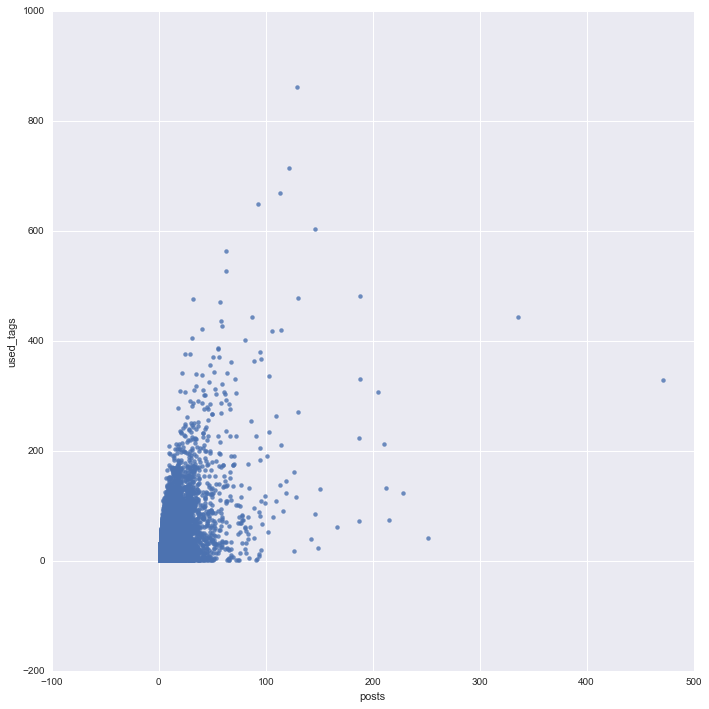

In [26]:
users = {}
for name, group in final_data.groupby("username"):
    users[name] = {}
    tags_set = set()
    for t in group["tags"]:
        tag_set = set(str(t).split(","))
        tags_set.update(tag_set)
    users[name]["used_tags"] = len(tags_set)
    users[name]["posts"] = len(group["tags"])
users_df = pd.DataFrame.from_dict(users, orient="index")
posts_used_tags = sns.lmplot('posts', 'used_tags', data=users_df, fit_reg=False, size=10)

Based on this plot we have defined accounts that shouldn't be used:

In [27]:
users_df[(users_df["used_tags"] < 200) & (users_df["posts"] > 100)]

,posts,used_tags
1iminchik1,252,42
alexspb_ru,149,24
apriori_salon,151,131
bar_nebar,119,145
ginzaprojectspb,107,79
hashtag.tsvety,215,75
iamjenia,116,91
instamodatrends,142,39
iswagpeterburg,128,117
keratinka_spb,167,62
